## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that render networks to meaningfully characterize the structure of words and documents (or subdocuments like chapters or paragraphs) from your corpus. What are useful filters and thresholds and what semantic structures do they reveal that give insight into the social world and social game inscribed in your corpus? Interrogate interesting subgraphs of your network and detail what they reveal about the semantic space involved.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip

#This will be doing most of the work
import networkx as nx

import sklearn #For generating some matrices
import pandas #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics

import pickle #if you want to save layouts
import os

%matplotlib inline

In [4]:
neg_df = pandas.read_csv('E:/Content Analysis/comments_negative.csv', chunksize=5000)
for i in neg_df:
    neg_df = i
    break
neg_df

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,cnyhtv3,t1_cnybrh6,t5_2sokh,t3_2tdpp7,Devil's advocate here for sake of argument. W...,-129,-129,dasfeesh,0,t3_2tdpp7,Glad he's going down for assault charges. Shou...,89,89,jetkrosswind,0
4996,c63qmqx,t1_c63qetq,t5_2rfxx,t3_zdzr3,Are you reading with your ears? xD Hes talking...,-129,-129,Aelstar,0,t3_zdzr3,Well if you spend a lot of time in enemy jungl...,84,84,nietie,0
4997,cp6gxvu,t1_cp6gnuv,t5_2y8xf,t3_2y48t6,Gay man here who visits TRP decently often: i...,-129,-129,OhMy8008,0,t3_2y48t6,Found theredpiller.,79,79,mitigateaccomp,0
4998,c6t5eja,t1_c6t3o8t,t5_2qh33,t3_1287dy,PSY,-129,-129,astrograph,0,t3_1287dy,Jackie Chan from The Tuxedo?,258,258,Jaboomaphoo,0


In [5]:
neg_df['tokenized_sents'] = neg_df['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
neg_df['normalized_sents'] = neg_df['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [6]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized
import sklearn.feature_extraction

In [7]:
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence = senVectorizer.fit_transform(neg_df['text'])

In [8]:
senVects_incidence.shape

(5000, 12041)

In [9]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(senVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence[d, w]}) for d, w in zip(*senVects_incidence.nonzero())))

In [10]:
print(nx.info(g_2mode))

Name: 
Type: Graph
Number of nodes: 17041
Number of edges: 65375
Average degree:   7.6727


In [11]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [12]:
gDoc = contractNetwork(g_2mode, 'doc')

In [13]:
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 5000
Number of edges: 2041117
Average degree: 816.4468


In [14]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 12041
Number of edges: 968168
Average degree: 160.8119


In [15]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

1.3341052379339122

In [16]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [17]:
g = wordCooccurrence(neg_df['normalized_sents'][:1000].sum())

In [18]:
len(g.nodes)

4759

In [19]:
len(g.edges)

43496

In [20]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 3])

In [21]:
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [22]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [23]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 250
Number of edges: 608
Average degree:   4.8640


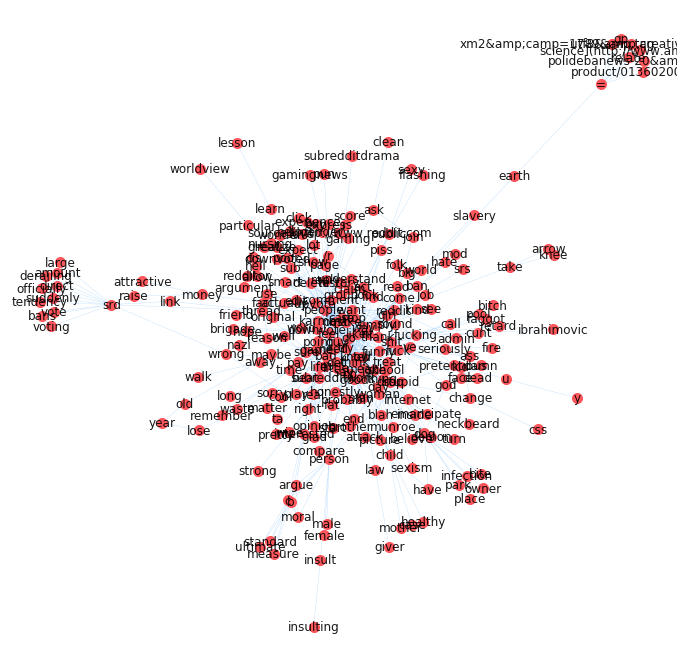

In [24]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (12,12))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue')

In [25]:
giant = nx.Graph(giant)
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 2000]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 250
Number of edges: 608
Average degree:   4.8640


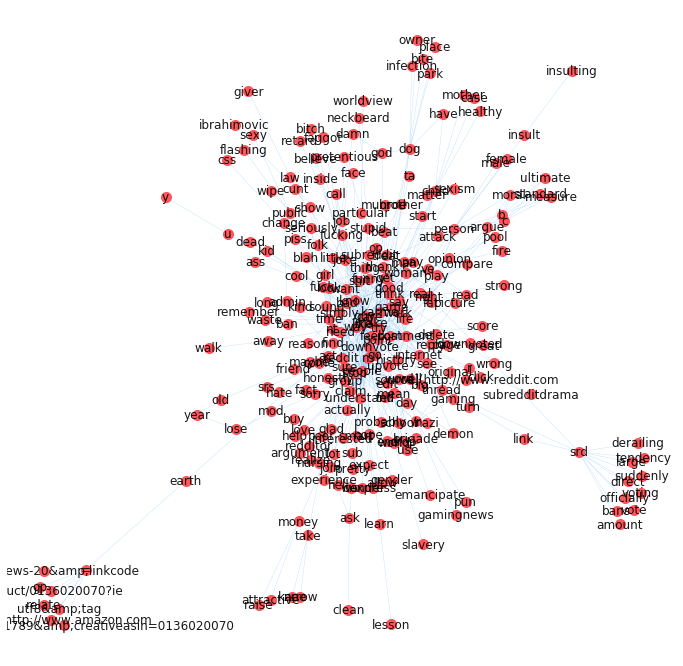

In [26]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (12,12))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') 

In [27]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

people, like, m, downvote, know, guy, fuck


In [28]:
neighbors = giant.neighbors('woman')
neigh_sub = giant.subgraph(neighbors)
print(nx.info(neigh_sub))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 25
Average degree:   5.0000


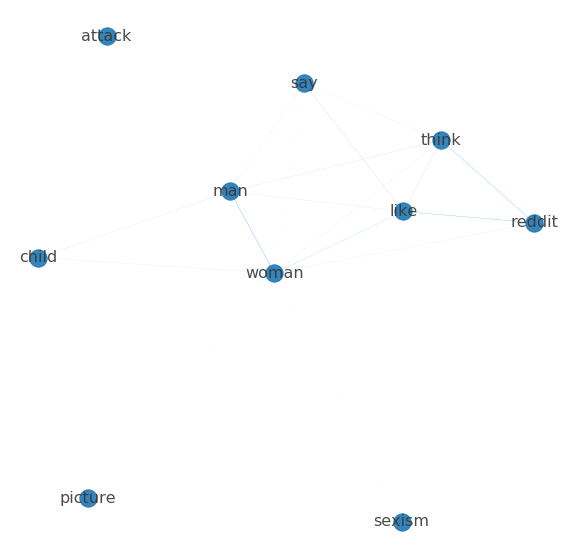

In [29]:
layout_amer = nx.spring_layout(neigh_sub, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in neigh_sub.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in neigh_sub.edges(data = True)))
nx.draw(neigh_sub, ax = ax, pos = layout_amer, labels = {n:n for n in neigh_sub.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in neigh_sub.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

In [30]:
neighbors = gWord.neighbors('man')
neighborsPlus1 = set(neighbors)
for n in neighbors:
    neighborsPlus1 |= set(giant.neighbors(n))
    
for x in neighborsPlus1:
    print(x)

grammar
expel
mer
dissenter
j6db8
humanity
whore
atkins
prophecy
painfully
verkligen
sleep
villain
family
nuance
amundo
kind
get
hater
lying(but
yea
frown
untalented
avalanche
crippled
exact
scientifically
jarring
ncvs
buddy
muddle
gt;i
ya
purpose
sundance
take
j6b00
scenario
hospital
guarantee
tribute
ybpxa.jpg
hadamar
prosecute
terminally
soften
save
cute
assume
factor
absolutely
illegal
eliminate
feeling
misguided
openly
anymore
prostitute
brutal
repeat
true&amp;_&amp;ericextsearch_searchvalue_0
iq
1=1
currently
backwards
wen
co7yhru
rest
covenant
disable
skulden
evolutionary
greet
maybe
image](http://i.imgur.com/8e0mm.jpg
gt;woman
silly
extermination
alla
completely
iama
gym
upvote
slow
alredy
lover
popular
recognition
knee
med
facebook
interchangable
j30x9
devil
tit
secretly
fit
amp;#3232;\_&amp;#3232
stock
generous
bus
guy
hahaha
oppression
gang
national
circlejerking
cancer
abusive
terminology
fool
misinterpret
fla
certainly
filter
weekend
scientific
irvine
sole
sell
fakerape
ku

contribution
paste
ing
assertive
volume
disgusting
crucifiction
shame
http://rmirror.net/r/videos/comments/rrsxs/white_kid_sexually_molested_robbed_assaulted_by/
interrogate
make
sweeping
breed
better
penetrate
awesome
club](http://www.youtube.com
kid
train
die
ens
hanhewd
civil
organize
rivalry
overpopulated
offended
insanity
vandalism
phew
thetrollking
variable
flight
guy51234:**](http://www.reddit.com
manner
weirdo
women](http://www.reddit.com
undergo
endless
victoria
wrong
kinda
book
tihs
http://en.wikipedia.org/wiki/race_and_crime#united_state
tire
b4
previous
check
depend
detroit
diaper
not).second
protection
leftover
anarchism
overweight
frend
sistur
paragraph
sim
inch
outshine
olive
reduce
deed
realize
letter
average
gurls
sober
without
offender
factsheet
arrive
promiscuity
obvious
reality
resource
john
punish
mr
language
female
armed
knight
retire
convincing
gambling
pro
husband
c26c945
begin
index.html
butts
justin
c29mfbi
desposal!!!first
societal
domestic
puzzle
william
pay

In [31]:
neigh_sub2 = giant.subgraph(neighborsPlus1)
print(nx.info(neigh_sub))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 25
Average degree:   5.0000


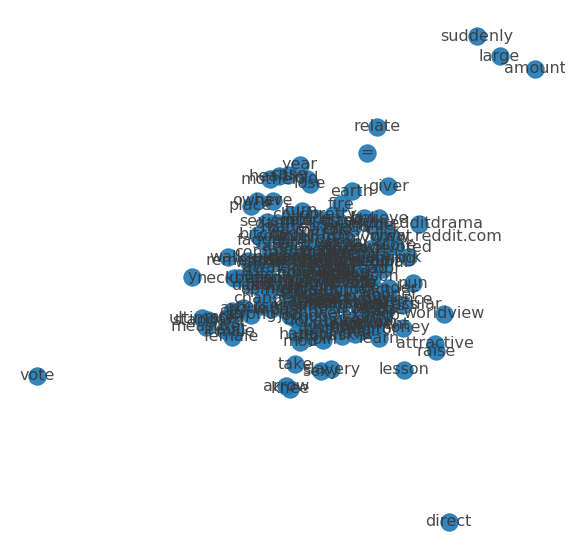

In [32]:
layout_amer = nx.spring_layout(neigh_sub2, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
centralities_amer = nx.eigenvector_centrality(neigh_sub2)
maxC = max(centralities_amer.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in neigh_sub2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in neigh_sub2.edges(data = True)))
nx.draw(neigh_sub2, ax = ax, pos = layout_amer, labels = {n:n for n in neigh_sub2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in neigh_sub2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

In [33]:
neighbors = giant.neighbors('people')
neigh_sub = giant.subgraph(neighbors)
print(nx.info(neigh_sub))

Name: 
Type: Graph
Number of nodes: 81
Number of edges: 291
Average degree:   7.1852


Considering that my dataset is about Reddit comments, which do not have paragraphs and cannot be divided into seperate documents, I only analyze the word network. According to the analyses, I find that to restrict the range of research to neighbors of nodes or a completely connected set of nodes can lead to more interpretable and meaningful results. What the analyses reveal about this dataset is that in these comments, words like "people" act as the absolute core of all the content or topics, which shows that people are more willing to talk about the qualities of a whole group. I guess that when imposing your ideas on a wide group of people can easily lead to downvotes.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that calculate different kinds of centrality for distinct words or documents in a network composed from your corpus of interest. Which type of words tend to be most and least central? Can you identify how different centrality measures distinguish different kind of words in your corpus? What do these patterns suggest about the semantic content and structure of your documents? Finally, calculate global measure for your network(s) and discuss what they reveal.

In [34]:
dcentralities = nx.degree_centrality(giant)

In [35]:
dcentralities['people']

0.3293172690763052

In [36]:
max(dcentralities.items(), key = lambda x : x[1])

('people', 0.3293172690763052)

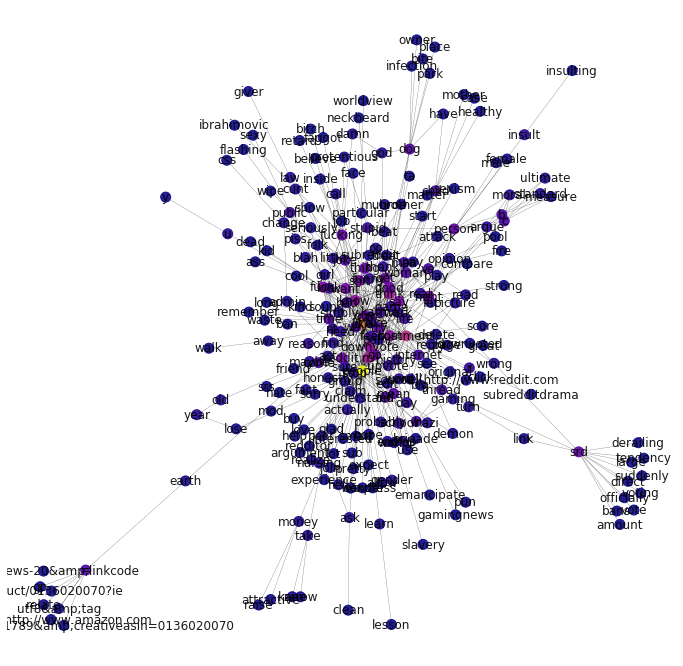

In [37]:
fig, ax = plt.subplots(figsize = (12,12))
maxC = max(dcentralities.items(), key = lambda x : x[1])[1]
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = [dcentralities[n] / maxC for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

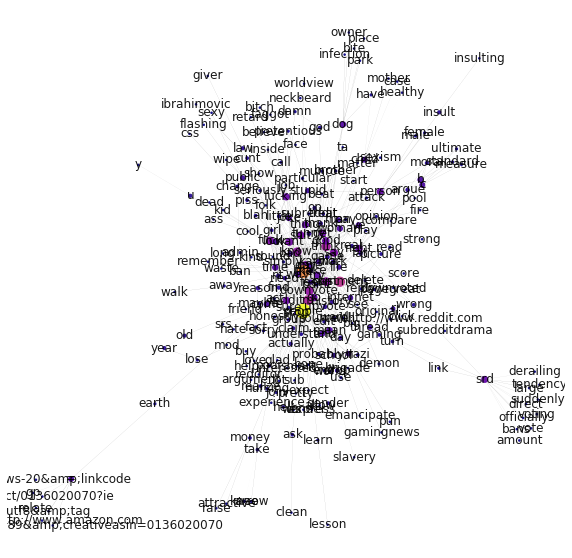

In [38]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(dcentralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gWord.edges(data = True)], 
        alpha = .9, 
        node_color = [dcentralities[n] / maxC for n in giant.nodes],
        node_size = [dcentralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

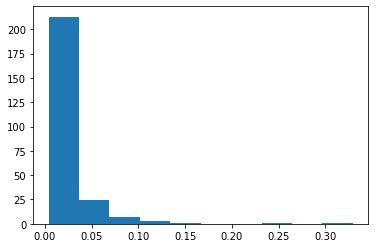

In [39]:
plt.hist(list(dcentralities.values()))
plt.show()

In [40]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('people', 0.3293172690763052),
 ('like', 0.24096385542168672),
 ('comment', 0.14056224899598393),
 ('m', 0.12449799196787148),
 ('think', 0.11646586345381525),
 ('downvote', 0.10441767068273092),
 ('know', 0.1004016064257028),
 ('post', 0.09638554216867469),
 ('say', 0.08433734939759036),
 ('fuck', 0.08433734939759036)]

In [41]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('place', 0.004016064257028112),
 ('cool', 0.004016064257028112),
 ('walk', 0.004016064257028112),
 ('interested', 0.004016064257028112),
 ('argument', 0.004016064257028112),
 ('large', 0.004016064257028112),
 ('sexism', 0.004016064257028112),
 ('raise', 0.004016064257028112),
 ('hope', 0.004016064257028112),
 ('ass', 0.004016064257028112)]

In [42]:
centralities = nx.closeness_centrality(giant)

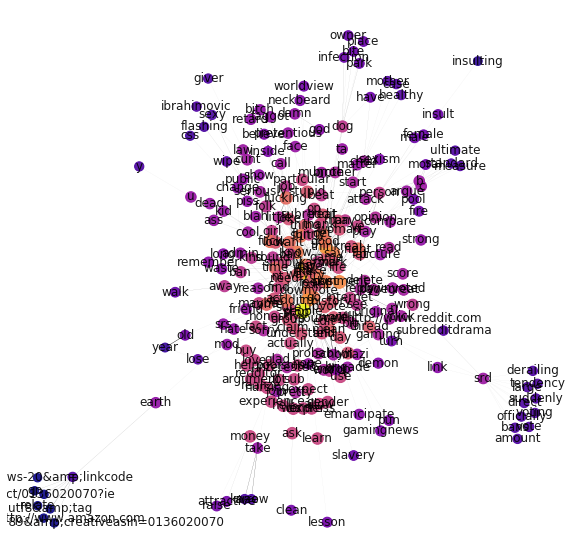

In [43]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in giant.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in giant.nodes],
        node_size = [centralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

In [44]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('people', 0.5144628099173554),
 ('like', 0.47338403041825095),
 ('think', 0.4353146853146853),
 ('m', 0.43154246100519933),
 ('comment', 0.4213197969543147),
 ('guy', 0.4129353233830846),
 ('say', 0.4115702479338843),
 ('post', 0.4061990212071778),
 ('know', 0.40553745928338764),
 ('try', 0.4035656401944895)]

In [45]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('css', 0.21708805579773321),
 ('year', 0.20612582781456953),
 ('insulting', 0.19856459330143542),
 ('gp', 0.1822840409956076),
 ('relate', 0.1822840409956076),
 ('science](http://www.amazon.com', 0.1822840409956076),
 ('xm2&amp;camp=1789&amp;creativeasin=0136020070', 0.1822840409956076),
 ('polidebanews-20&amp;linkcode', 0.1822840409956076),
 ('utf8&amp;tag', 0.1822840409956076),
 ('product/0136020070?ie', 0.1822840409956076)]

In [46]:
ecentralities = nx.eigenvector_centrality(giant)

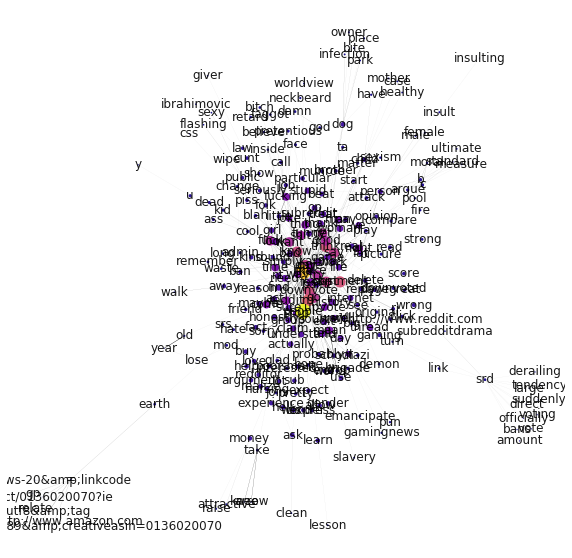

In [47]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(ecentralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in giant.edges(data = True)], 
        alpha = .9, 
        node_color = [ecentralities[n] / maxC for n in giant.nodes],
        node_size = [ecentralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

In [48]:
sorted(ecentralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('people', 0.3981282055494339),
 ('like', 0.3488951381344599),
 ('m', 0.22868242472361577),
 ('comment', 0.20783150684309637),
 ('think', 0.20593122256359103),
 ('downvote', 0.1988292117184695),
 ('know', 0.19241000311055534),
 ('post', 0.1799237087539078),
 ('guy', 0.17370418075121505),
 ('say', 0.17115276663779058)]

In [49]:
sorted(ecentralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('large', 0.0003817402353191695),
 ('year', 0.0002097400502795437),
 ('insulting', 0.00014050546082887788),
 ('gp', 2.503084508371399e-05),
 ('relate', 2.503084508371399e-05),
 ('science](http://www.amazon.com', 2.503084508371399e-05),
 ('xm2&amp;camp=1789&amp;creativeasin=0136020070', 2.503084508371399e-05),
 ('polidebanews-20&amp;linkcode', 2.503084508371399e-05),
 ('utf8&amp;tag', 2.503084508371399e-05),
 ('product/0136020070?ie', 2.503084508371399e-05)]

In [50]:
def filterWords(G, minWeight = 3, filter_ = "betweenness", rule = "number", value_of_rule = 200):
    """Function to filter network by degree centrality measures"""
    G = G.copy()
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] < minWeight])
    except:
        print("weight might be missing from one or more edges")
        raise
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ == "closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    elif filter_ == "degree":
        index = nx.degree_centrality(G) #degree centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")    
        
    if rule=='number':# if filter by limiting the total number of nodes 
        
        sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
        value_of_rule = np.min([value_of_rule, len(G.nodes)])
        
        nodes_remain = {}
        for word, centr in sorted_index[:value_of_rule]:
            nodes_remain[word] = centr
        G.remove_nodes_from([n for n in index if n not in nodes_remain])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='above':# if filter by limiting the min value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] >=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='below':# if filter by limiting the max value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] <=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

In [51]:
giant_filtered30 = filterWords(giant, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(giant_filtered30))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 116
Average degree:   9.2800


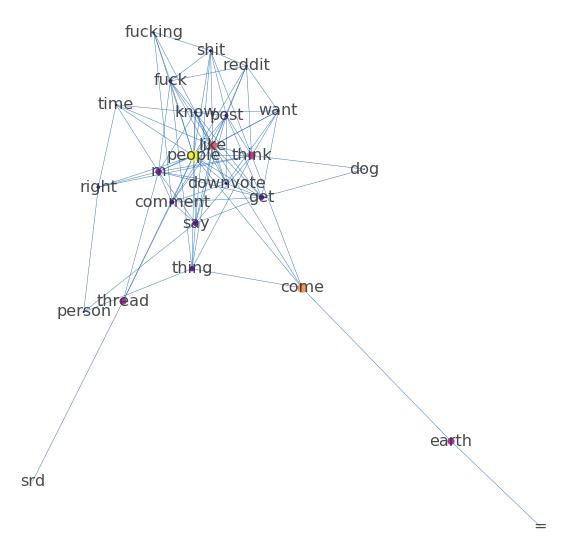

In [52]:
layout_giant_filtered30 = nx.spring_layout(giant_filtered30, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_giant30 = nx.betweenness_centrality(giant_filtered30)
maxC = max(centralities_giant30.items(), key = lambda x : x[1])[1]
nx.draw(giant_filtered30, ax = ax, pos = layout_giant_filtered30, labels = {n: n for n in giant_filtered30.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_giant30[n] / maxC for n in giant_filtered30.nodes],
        node_size = [centralities_giant30[n] / maxC * 100 for n in giant_filtered30.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [53]:
nx.density(giant)

0.01953413654618474

In [54]:
np.mean([v for w,v in nx.degree(giant)])

4.864

In [55]:
nx.diameter(giant)

7

Because the normalization algorithm cannot clean words like addresses and codes thoroughly, which leads to the fact the least central types of words are mostly these "non-words". The most central words are those most frequently used when expressing opinions, like "think", "know", "like", etc. and other common words like "people". Those different measures of centrality happen to produce similar results, which cannot help distinguish between different kinds of words. In this dataset, the frequency of insulting language is very high, which indicates a casual and insulting way to speak in Reddit comments given that those users are anonymous.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that construct at least two different networks comprising different combinations of word types, linked by different syntactic structures, which illuminate your corpus and the dynamics you are interested to explore. Graph these networks or subnetworks within them. What are relationships that are meaningful? 

<span style="color:red">***Stretch***: Graph some word-centered "ego-networks" with words one link away, two links away, and three links away (we only did up to two links away above).

In [56]:
import spacy
nlp = spacy.load('en')

In [57]:
def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for sent in sentences:
        s = [(w, t) for w, t in lucem_illud_2020.spacy_pos(sent) if t in posType]
        for w, t in s:
            if w not in wordsMap:
                wordsMap[w] = t
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in reducedSents:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g

In [58]:
gNN = posCooccurrence(neg_df['normalized_sents'].sum(), 'NN')

In [59]:
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 4317
Number of edges: 24651
Average degree:  11.4204


In [60]:
gNN.remove_nodes_from([n for n in gNN.nodes if len(set(gNN.neighbors(n))) <= 100]) 
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 1033
Average degree:  33.3226


In [61]:
gNN.remove_edges_from([(n1, n2) for n1, n2, d in gNN.edges(data = True) if d['weight'] <= 2])
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 298
Average degree:   9.6129


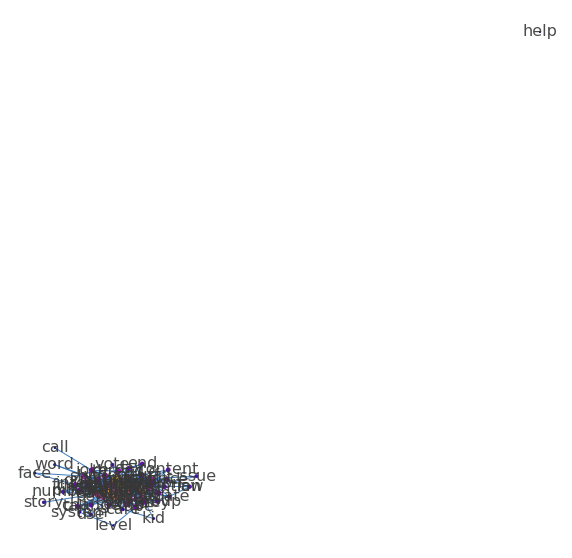

In [62]:
layout_nn = nx.spring_layout(gNN, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn = nx.eigenvector_centrality(gNN)
maxC = max(centralities_nn.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNN.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNN.edges(data = True)))
nx.draw(gNN, ax = ax, pos = layout_nn, labels = {n: n for n in gNN.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn[n] / maxC for n in gNN.nodes],
        node_size = [centralities_nn[n] / maxC * 100 for n in gNN.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [80]:
gNV = posCooccurrence(neg_df['normalized_sents'].sum(), 'NN', 'VB')

In [81]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 4585
Number of edges: 37481
Average degree:  16.3494


In [92]:
gNV.remove_edges_from([(n1, n2) for n1, n2, d in gNV.edges(data = True) if d['weight'] <= 5])
gNV.remove_nodes_from([n for n in gNV.nodes if len(set(gNV.neighbors(n))) <= 4])
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 142
Average degree:   8.8750


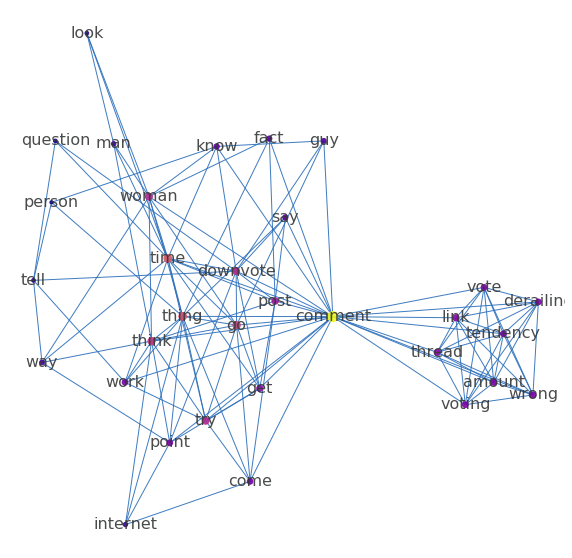

In [93]:
layout_nn = nx.spring_layout(gNV, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nv = nx.eigenvector_centrality(gNV)
maxC = max(centralities_nv.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNV.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNV.edges(data = True)))
nx.draw(gNV, ax = ax, pos = layout_nn, labels = {n: n for n in gNV.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nv[n] / maxC for n in gNV.nodes],
        node_size = [centralities_nv[n] / maxC * 100 for n in gNV.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       ) 

In [97]:
g_i = gNV.subgraph(['woman'] + list(gNV.neighbors('woman')))

In [98]:
print(nx.info(g_i))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 39
Average degree:   7.0909


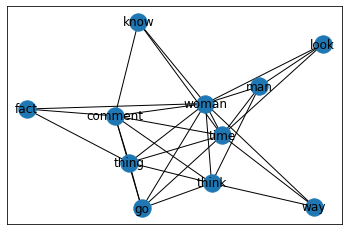

In [99]:
nx.draw_networkx(g_i)

In [101]:
storyNeighbors = gNV.neighbors('man')
set(storyNeighbors)

{'look', 'man', 'think', 'time', 'woman'}

In [102]:
storyNeighbors = set(gNV.neighbors('man'))
storyNeighborsPlus1 = set(storyNeighbors)
for n in storyNeighbors:
    storyNeighborsPlus1 |= set(gNV.neighbors(n))

In [103]:
gNV_story = gNV.subgraph(storyNeighborsPlus1)
print(nx.info(gNV_story))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 80
Average degree:   8.4211


In [104]:
sorted(nx.degree_centrality(gNV_story).items(), key = lambda x: x[1], reverse = True)[:10]

[('time', 0.8888888888888888),
 ('comment', 0.8333333333333333),
 ('think', 0.7222222222222222),
 ('thing', 0.6666666666666666),
 ('woman', 0.6666666666666666),
 ('downvote', 0.5555555555555556),
 ('go', 0.5555555555555556),
 ('try', 0.5),
 ('post', 0.4444444444444444),
 ('get', 0.38888888888888884)]

In [105]:
sorted(nx.eigenvector_centrality(gNV_story).items(), key = lambda x: x[1], reverse = True)[:10]

[('comment', 0.3834479490082037),
 ('time', 0.36194047519934636),
 ('thing', 0.3082131422608623),
 ('think', 0.3044047992670657),
 ('go', 0.28958171926314225),
 ('woman', 0.28531237800369386),
 ('try', 0.25245664199056483),
 ('downvote', 0.22883476551797757),
 ('get', 0.2100874001844196),
 ('post', 0.2028013188236891)]

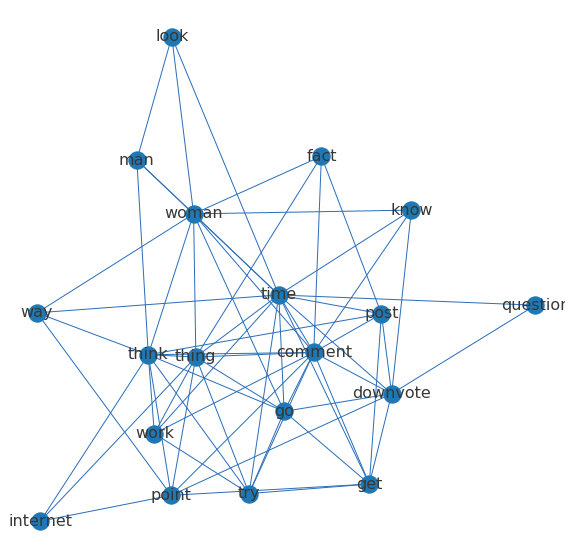

In [106]:
layout_story = nx.spring_layout(gNV_story, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(gNV_story, ax = ax, pos = layout_story, labels = {n: n for n in gNV_story.nodes()},
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
       ) 

In [107]:
storyNeighborsPlus2 = set(storyNeighborsPlus1)
for n in storyNeighborsPlus1:
    storyNeighborsPlus2 |= set(gNV.neighbors(n))

In [108]:
gNV_story = gNV.subgraph(storyNeighborsPlus2)
print(nx.info(gNV_story))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 142
Average degree:   8.8750


In [109]:
sorted(nx.degree_centrality(gNV_story).items(), key = lambda x: x[1], reverse = True)[:10]

[('comment', 0.8387096774193548),
 ('time', 0.5161290322580645),
 ('thing', 0.4838709677419355),
 ('downvote', 0.4193548387096774),
 ('think', 0.4193548387096774),
 ('go', 0.3870967741935484),
 ('woman', 0.3870967741935484),
 ('link', 0.3225806451612903),
 ('post', 0.3225806451612903),
 ('try', 0.3225806451612903)]

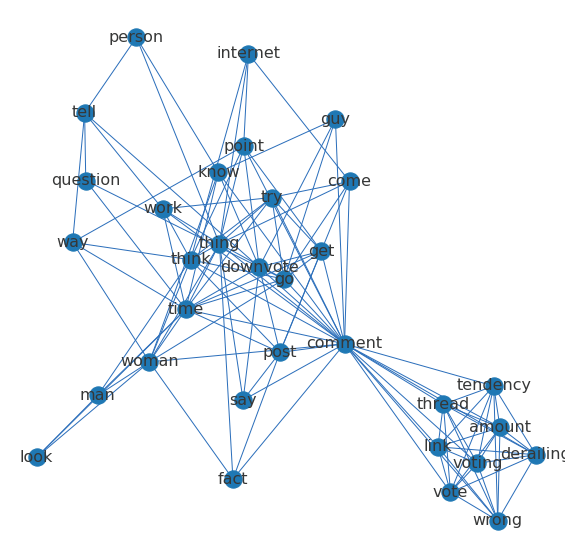

In [110]:
layout_story = nx.spring_layout(gNV_story, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(gNV_story, ax = ax, pos = layout_story, labels = {n: n for n in gNV_story.nodes()},
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
       ) 

In [113]:
gNJ = posCooccurrence(neg_df['normalized_sents'][:100].sum(), 'NN', 'JJ')
print(nx.info(gNJ))

Name: 
Type: Graph
Number of nodes: 661
Number of edges: 1887
Average degree:   5.7095


In [114]:
gNJ_filtered200 = filterWords(gNJ, minWeight=2, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(gNJ_filtered200))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 28
Average degree:   2.2400


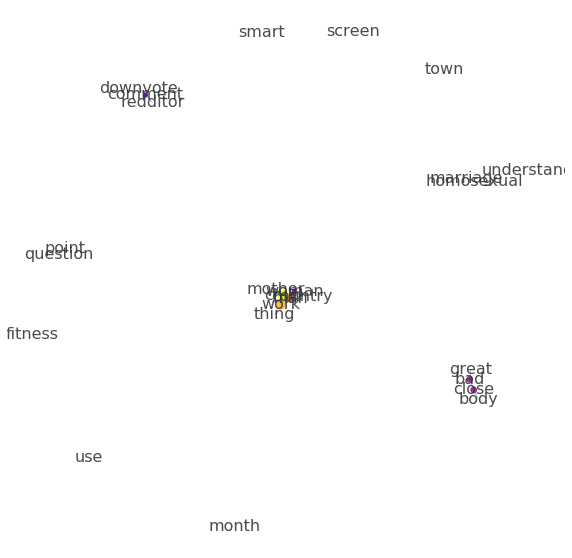

In [115]:
layout_NJ_filtered200 = nx.spring_layout(gNJ_filtered200, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nj200 = nx.betweenness_centrality(gNJ_filtered200)
maxC = max(centralities_nj200.items(), key = lambda x : x[1])[1]
nx.draw(gNJ_filtered200, ax = ax, pos = layout_NJ_filtered200, labels = {n: n for n in gNJ_filtered200.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_nj200[n] / maxC for n in gNJ_filtered200.nodes],
        node_size = [centralities_nj200[n] / maxC * 100 for n in gNJ_filtered200.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [118]:
storyNeighbors = gNV.neighbors('voting')
set(storyNeighbors)

{'amount',
 'comment',
 'derailing',
 'link',
 'tendency',
 'thread',
 'vote',
 'wrong'}

In [125]:
storyNeighbors = set(gNV.neighbors('voting'))
storyNeighborsPlus1 = set(storyNeighbors)
for n in storyNeighbors:
    storyNeighborsPlus1 |= set(gNV.neighbors(n))

In [126]:
gNV_story = gNV.subgraph(storyNeighborsPlus1)
print(nx.info(gNV_story))

Name: 
Type: Graph
Number of nodes: 25
Number of edges: 112
Average degree:   8.9600


In [127]:
sorted(nx.degree_centrality(gNV_story).items(), key = lambda x: x[1], reverse = True)[:10]

[('comment', 1.0833333333333333),
 ('thing', 0.5416666666666666),
 ('go', 0.5),
 ('time', 0.5),
 ('downvote', 0.4583333333333333),
 ('link', 0.41666666666666663),
 ('post', 0.41666666666666663),
 ('try', 0.41666666666666663),
 ('think', 0.41666666666666663),
 ('thread', 0.41666666666666663)]

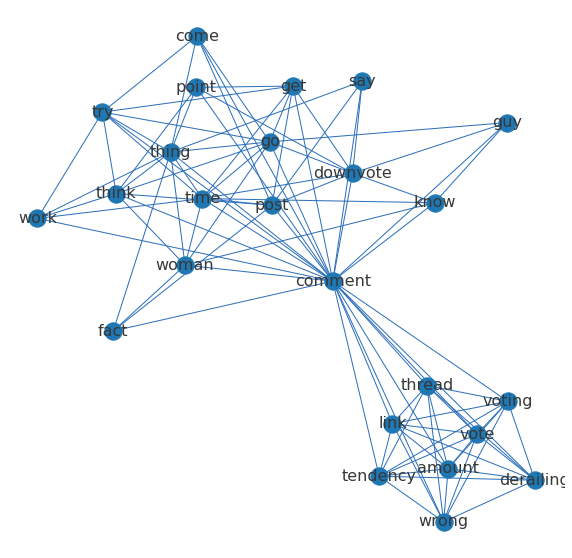

In [128]:
layout_story = nx.spring_layout(gNV_story, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(gNV_story, ax = ax, pos = layout_story, labels = {n: n for n in gNV_story.nodes()},
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
       ) 

According to the above graph, the network can be divided into two parts connected by the node "comment", the upper part is mostly composed of common verbs without specific meanings, and intuitively more daily content. By contrast, the lower part is obviously about political stuff like voting and derailing. So maybe by means of network analysis, I can roughly divide the main topics of those comments into a political part and a non-political or daily part, which have a different habit of words.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that perform a similar social similarity or influence analysis on a dataset relevant to your final project. Create relationships between actors in a network based on your dataset (e.g., person to person or document to document), and perform analyses that interrogate the structure of their interactions, similarity, and/or influence on one another. (For example, if relevant to your final project, you could explore different soap operas, counting how many times a character may have used the word love in conversation with another character, and identify if characters in love speak like each other. Or do opposites attract?) What does that analysis and its output reveal about the relative influence of each actor on others? What does it reveal about the social game being played?

<span style="color:red">Stretch 1:
Render the social network with weights (e.g., based on the number of scenes in which actors appear together), then calculate the most central actors in the show.Realtime output can be viewed in shell.

<span style="color:red">Stretch 2:
Implement more complex measures of similarity based on the papers you have read.

Given that my dataset is about Reddit comments, which do not have any meaningful documents or actors which can act as the objectives of social influence analysis. So I decide to use the same dataset as in the sample, but concentrate on a different opera

In [2]:
corpora_address = "E:/Content Analysis/SOAP"

In [3]:
soap_texts = lucem_illud_2020.loadDavies(corpora_address, num_files=1000)

text_0-tez.zip
text_1-teh.zip
text_2-wts.zip
text_3-pem.zip
text_4-jfy.zip
text_5-rag.zip
text_6-egn.zip
text_7-jss.zip
text_8-sbo.zip
text_9-jtw.zip


In [4]:
import zipfile

In [5]:
zfile = zipfile.ZipFile(corpora_address + "/soap_sources.zip")
source = []

In [6]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [7]:
source[0:20]

[b'textID\tyear\tshow\t\turl\r\n',
 b'-----\t-----\t-----\t\t-----\r\n',
 b'\r\n',
 b'1\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-04-09-01.shtml\r\n',
 b'2\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-05-09-01.shtml\r\n',
 b'3\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-06-20-01.shtml\r\n',
 b'4\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-07-01.shtml\r\n',
 b'5\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-08-01.shtml\r\n',
 b'6\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-09-01.shtml\r\n',
 b'7\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-10-01.shtml\r\n',
 b'8\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-13-01.shtml\r\n',
 b'9\t2001\tAll My Childen\thttp://tvmegasite.net/tra

In [8]:
import pandas as pd

In [9]:
soap_dict = {}

In [10]:
for soap in source[3:]:
    try:
        textID, year, show, url = soap.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    if show.strip() not in soap_dict:
        soap_dict[show.strip()] = []
    if show.strip() in soap_dict:
        try:
            soap_dict[show.strip()].append(soap_texts[textID.strip()])
        except KeyError:
            continue

In [11]:
soap_dict.keys()

dict_keys(['All My Childen', 'As the World Turns', 'Bold and Beautiful', 'Days of Our Lives', 'General Hospital', 'Guiding Light', 'One Life to Live', 'Passions', 'Port Charles', 'Young and Restless'])

In [12]:
soap_df = pd.DataFrame(columns=["Soap Name", "Tokenized Texts"])

In [13]:
i = 0

In [14]:
for soap in soap_dict:
    # since there were multiple lists
    print(soap)
    full_script = []
    for part in soap_dict[soap]:
        full_script = full_script + part
    soap_df.loc[i] = [soap, full_script]
    i += 1

All My Childen
As the World Turns
Bold and Beautiful
Days of Our Lives
General Hospital
Guiding Light
One Life to Live
Passions
Port Charles
Young and Restless


In [15]:
soap_df

,Soap Name,Tokenized Texts
0,All My Childen,"[@!Liza, You, 're, in, early, @!Ryan, Yeah, I,..."
1,As the World Turns,"[@!Katie, Simon, where, are, you, @!Simon, Kat..."
2,Bold and Beautiful,"[@!Morgan, What, 's, the, matter, Stephanie, Y..."
3,Days of Our Lives,"[@!Philip, Seems, like, every, time, I, look, ..."
4,General Hospital,"[@!Stefan, I, love, her, @!Jax, No, Cassadine,..."
5,Guiding Light,"[@!Reva, Well, it, 's, very, peaceful, Your, b..."
6,One Life to Live,"[@!Rae, What, She, even, has, a, new, friend, ..."
7,Passions,"[@!Kay, Going, to, get, pregnant, and, I, 'm, ..."
8,Port Charles,"[@!Jack, There, you, are, you, son, @!Chris, H..."
9,Young and Restless,"[@!Sharon, Yeah, I, could, n't, sleep, @!Victo..."


In [16]:
atwt = soap_df['Tokenized Texts'][1]

In [17]:
' '.join(atwt[:1500])

"@!Katie Simon where are you @!Simon Katie @!Katie You 're in my dream @!Simon No I 'm on your damn beach If you do anything like this again I 'm gon na leave you here Katie drops a coconut on Simon 's foot Ow @Ow ow @!Katie Oh Simon I 'm sorry I 'm so so sorry @!Simon Do n't do n't touch me @!Katie Is your foot okay @!Simon Yes it 's fine Leave me alone Ow @!Katie You found me @!Simon Yes yes I found you What do you think I 'm going to do just leave you here Wake up @!Jack Ca n't find record of payment Past due past due Past due past due Carly You 're up early Sorry Carly goes into the kitchen and brings out an empty coffee pot Hey Did you drink all this @!Jack Yeah Sorry @!Carly No no that 's it 's okay you might not sleep for a week Hey it 's going to be okay Jack We can always use the Carly Tenney system @!Jack Rob a bank @!Carly No that 's Plan B Plan A you just throw all the bills up in the air and whatever stays up there well that deserves to get paid @!Jack With what I gave her

In [18]:
characters = {}

In [20]:
for token in atwt:
    if token[0] == '@':
        # all characters or actions start with @, so we add that to character
        if token[2:] not in characters:
            characters[token[2:]] = 0
        if token[2:] in characters:
            characters[token[2:]] += 1


In [22]:
for character in characters:
    if characters[character] > 2000:
        print(character, characters[character])

Katie 3723
Jack 4172
Carly 4941
Emily 2598
Craig 3966
Henry 2153
Paul 4162
Barbara 2388
Lily 3141
Holden 2640
Dusty 2547
Meg 2740


In [23]:
actor_network = nx.Graph()

In [24]:
for character in characters:
    if characters[character] > 2000:
        actor_network.add_node(character, lines_spoken= characters[character], words=[])

In [25]:
len(actor_network.nodes.data())

12

In [26]:
actor_network.nodes.data()

NodeDataView({'Katie': {'lines_spoken': 3723, 'words': []}, 'Jack': {'lines_spoken': 4172, 'words': []}, 'Carly': {'lines_spoken': 4941, 'words': []}, 'Emily': {'lines_spoken': 2598, 'words': []}, 'Craig': {'lines_spoken': 3966, 'words': []}, 'Henry': {'lines_spoken': 2153, 'words': []}, 'Paul': {'lines_spoken': 4162, 'words': []}, 'Barbara': {'lines_spoken': 2388, 'words': []}, 'Lily': {'lines_spoken': 3141, 'words': []}, 'Holden': {'lines_spoken': 2640, 'words': []}, 'Dusty': {'lines_spoken': 2547, 'words': []}, 'Meg': {'lines_spoken': 2740, 'words': []}})

In [27]:
actor_network.nodes['Emily']['lines_spoken']

2598

In [28]:
i = 0

In [29]:
for token in atwt:
    i += 1
    if i > len(atwt):
        break
    if token[0] == "@":
        if token[2:] in actor_network.nodes():
            j = i
            for token_ in atwt[i:]:
                if token_[0] == "@":
                    # if both the characters exist in the graph, add a weight
                    if token_[2:] != token[2:] and token_[2:] in actor_network.nodes():
                        if (token[2:], token_[2:]) not in actor_network.edges():
                            actor_network.add_edge(token[2:], token_[2:], weight=0)
                        if (token[2:], token_[2:]) in actor_network.edges():
                            actor_network.edges[(token[2:], token_[2:])]['weight'] += 1
                    break
                j += 1
            # adding characters sentences
            actor_network.nodes[token[2:]]['words'].append(atwt[i:j])

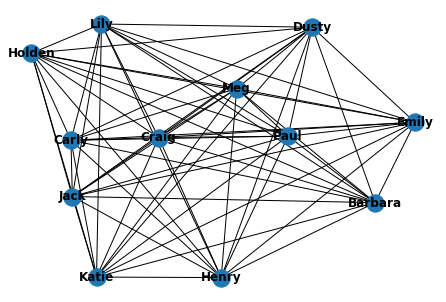

In [30]:
nx.draw(actor_network, with_labels=True, font_weight='bold')

In [31]:
import seaborn as sns

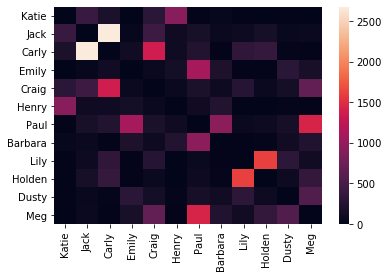

In [32]:
L = []
for node in actor_network.nodes():
    l = []
    for node_ in actor_network.nodes():
        if node == node_:
            l.append(0)
        else:
            l.append(actor_network.edges[(node, node_)]['weight'])
    L.append(l)
M_ = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M_, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

As shown above, Jack and Carly, Lily and Holden, Meg and Paul, Craig and Carly, these four pairs have the most frequent interactions, which shows that they have more intimate relationships with each other compared with others.

In [33]:
import nltk

In [34]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [35]:
corpora = []
for character in actor_network.nodes():
    character_words = []
    for sentence in actor_network.nodes[character]['words']:
        for word in sentence:
            character_words.append(word)
    corpora.append(lucem_illud_2020.normalizeTokens(character_words))

In [36]:
L = []

In [37]:
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)

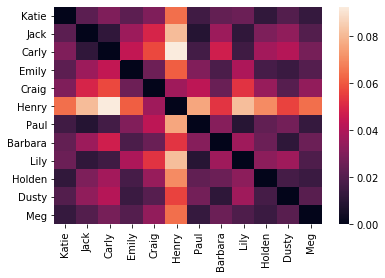

In [38]:
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

It is surprising that those who interact more often are actually not similar to each other in terms of talking. On the contrary, Henry, this specific character is weirdly similar to several other characters according to the heatmap, which suggests that either this character likes to mock others' words, or his lines are roughly designed and stemmed from other characters' lines. This result reveals that in this soap frequent interactions will not lead to similarity in their talking styles which may exist in real lives, and relationships can present themselves with characters speaking in different ways, which may suggest that in this social game, characters seek complements to their own personalities rather than similarities. 